In [ ]:
!pip install matplotlib
!pip install pandas
!pip install pandas_datareader
!pip install dataprep

from google.colab import drive

drive.mount("/content/gdrive")
%cd "/content/gdrive/Shareddrives/Reto AI SEPTIMO"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive
/content/gdrive/Shareddrives/Reto AI SEPTIMO


In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


!pip install seaborn
import seaborn as sns

data = pd.read_csv('us2022q2a.csv')
df1 = pd.read_csv('us2022q2a.csv',names = data.columns)
df1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
1,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.76167023,104,452000,NaN,2000,1
2,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,2679000,512000,0,4642000,45.2156075,73.75,452271.967,6,2000,2
3,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,2925000,528000,0,4902000,30.00323786,48.9375,453014.579,9,2000,3
4,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,3160000,830000,0,5265000,33.56684082,54.75,456366.381,12,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2
324443,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,11309.171,207.635,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3
324444,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4
324445,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1


In [ ]:
data = pd.read_csv('usfirms2022.csv')
df2 = pd.read_csv('usfirms2022.csv', names = data.columns)
df2 = df2[["Ticker","Name", "Sector NAICS\nlevel 1"]]
df2

,Ticker,Name,Sector NAICS\nlevel 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [ ]:
df = pd.merge(df1, df2, left_on='firm', right_on="Ticker")
df = df.drop(columns=['Ticker'])
df = df.drop(df[df.firm.isnull()].index)
df = df.drop(df[df.revenue.isnull()].index)
df = df.drop(df[df.cogs.isnull()].index)
df = df.drop(df[df.adjprice.isnull()].index)
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,0,4642000,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,0,4902000,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,0,5265000,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,0,5541000,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,0,5616000,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [ ]:
# Derive New Column from Existing Column
# Market Value = (originalprice * sharesoutstanding)

df = df.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))

# Book Value of the firm = (totalassets-totalliabilities)

df = df.assign(book_value=lambda x: x.totalassets.astype(np.float) - x.totalliabilities.astype(np.float))

# Print dfFly para observar si las nuevas columnas de BookValue y MarkertValue fueron creados de manera correcta
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970


In [ ]:
df = [y for _, y in df.groupby('firm', as_index=False)]

In [ ]:
for i in range(len(df)):
  df[i]['lprice'] = df[i].groupby(['firm'])['adjprice'].shift(4)
  df[i]['r'] = np.log(df[i]['adjprice'].astype(np.float)) - np.log(df[i]['lprice'].astype(np.float))
  df[i]['r2'] = np.log(df[i]['adjprice'].astype(np.float)) - np.log(df[i].groupby(['firm'])['adjprice'].shift(4).astype(np.float))
  df[i].loc['ADT':'ADTN',['adjprice','lprice','r','r2']].iloc[85:96,]
  #book firm value
  x = (df[i]['originalprice'].astype(np.float) * df[i]['sharesoutstanding'].astype(np.float) )
  #profit margin measures
  df[i]['operating_profit'] = (df[i]['revenue'].astype(np.float) - df[i]['cogs'].astype(np.float)  - df[i]['sgae'].astype(np.float))
  df[i]['ebit'] = (df[i]['revenue'].astype(np.float)  - df[i]['cogs'].astype(np.float)  - df[i]['sgae'].astype(np.float)  - df[i]['otheropexp'].astype(np.float))
  df[i]['operating_profit_margin'] = (df[i]['ebit'].astype(np.float)  / df[i]['revenue'].astype(np.float) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/u

In [ ]:
for i in range(len(df)):
  df[i]['revenue'] = df[i]['revenue'].astype(np.float)
  df[i]['cogs'] = df[i]['cogs'].astype(np.float)
  df[i]['sgae'] = df[i]['sgae'].astype(np.float)
  df[i]['otheropexp'] = df[i]['otheropexp'].astype(np.float)
  df[i]['extraincome'] = df[i]['extraincome'].astype(np.float)
  df[i]['finexp'] = df[i]['finexp'].astype(np.float)
  df_Final4 = df[i].tail(4)

  temp = df[i].tail(1)


  total_assets = list(temp['totalassets'])[0]
  total_liabilities = list(temp['totalliabilities'])[0]
  short_debt = list(temp['shortdebt'])[0]
  long_debt = list(temp['longdebt'])[0]
  stockholder_equity = list(temp['stockholderequity'])[0]
  adj_price = list(temp['adjprice'])[0]
  original_price = list(temp['originalprice'])[0]
  book_value = list(temp['book_value'])[0]
  market_value = list(temp['market_value'])[0]
  operating_profit = list(temp['operating_profit'])[0]
  ebit = list(temp['ebit'])[0]
  operating_profit_margin = list(temp['operating_profit_margin'])[0]
  sharesout_standing = list(temp['sharesoutstanding'])[0]
  naics = list(temp['Sector NAICS\nlevel 1'])[0]
  name = list(temp['Name'])[0]
  newDF = df_Final4.groupby('firm', as_index = False).agg({'revenue':'sum','cogs':'sum', 'sgae':'sum', 'otheropexp':'sum', 'extraincome':'sum', 'finexp':'sum'})

  newDF['totalassets'] = total_assets
  newDF['totalliabilities'] = total_liabilities
  newDF['shortdebt'] = short_debt
  newDF['longdebt'] = long_debt
  newDF['stockholderequity'] = stockholder_equity
  newDF['adjprice'] = adj_price
  newDF['originalprice'] = original_price
  newDF['sharesoutstanding'] = sharesout_standing
  newDF['book_value'] = book_value
  newDF['market_value'] = market_value
  newDF['operating_profit'] = operating_profit
  newDF['operating_profit_margin'] = operating_profit_margin
  newDF['ebit'] = ebit
  newDF['Sector NAICS\nlevel 1'] = naics
  newDF['Name'] = name

  df[i] = newDF


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/

In [ ]:
mergedDF = pd.DataFrame()
for i in df:
  mergedDF = mergedDF.append(i, ignore_index = True)
mergedDF

,firm,revenue,cogs,sgae,otheropexp,extraincome,finexp,totalassets,totalliabilities,shortdebt,...,adjprice,originalprice,sharesoutstanding,book_value,market_value,operating_profit,operating_profit_margin,ebit,Sector NAICS\nlevel 1,Name
0,A,6527000.0,3004000.0,2.056000e+06,0.0,41000.000000,81000.000,10455000,5333000,175000,...,118.56,118.77,298708.056,5122000.000,3.547756e+07,3.600000e+05,0.224020,3.600000e+05,Manufacturing,"Agilent Technologies, Inc"
1,AA,13386000.0,9653000.0,8.930000e+05,1138000.0,271000.000000,141000.000,15709000,8417000,1000,...,45.48795638,45.58,184448.686,7292000.000,8.407171e+06,6.570000e+05,0.200878,7.320000e+05,Manufacturing,Alcoa Corp
2,AAIC,31855.0,15523.0,0.000000e+00,0.0,-10809.000000,0.000,1084755,871057,NaN,...,3.25,3.25,35016.392,213698.000,1.138033e+05,4.526000e+03,0.415229,4.526000e+03,Finance and Insurance,Arlington Asset Investment Corp
3,AAL,40717000.0,0.0,4.160800e+07,0.0,251000.000000,1828000.000,67963000,76385000,2106000,...,12.68,12.68,649514.848,-8422000.000,8.235848e+06,1.017000e+06,0.075771,1.017000e+06,Transportation and Warehousing,American Airlines Group Inc
4,AAME,195299.0,0.0,1.915230e+05,0.0,0.000000,0.000,379274,270173,NaN,...,2.67,2.67,20398.497,109101.000,5.446399e+04,-2.115000e+03,-0.047348,-2.115000e+03,Finance and Insurance,Atlantic American Corp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,ZVIA,156702.0,93921.0,8.744600e+04,94595.0,51341.000000,0.000,112738.0,25539.0,685.0,...,2.81,2.81,67209.461,87199.000,1.888586e+05,-6.700000e+03,-0.323723,-1.474300e+04,Manufacturing,Zevia Pbc
3555,ZVO,230001.0,149303.0,1.118000e+05,5753.0,-3980.000000,0.000,85433.0,78828.0,0.0,...,0.9701,0.9701,34095.968,6605.000,3.307650e+04,-9.723000e+03,-0.016368,-8.410000e+02,Educational Services,Zovio Inc
3556,ZWS,340300.0,195100.0,1.196000e+05,3400.0,50400.000000,22000.000,1176300.0,946900.0,5600.0,...,27.179735,27.24,125967.533,229400.000,3.431356e+06,5.380000e+04,0.188248,5.350000e+04,Manufacturing,Zurn Elkay Water Solutions Corp
3557,ZY,14546.0,48949.0,2.327660e+05,69138.0,-2028.000000,26572.000,470968.0,234345.0,7900.0,...,1.23,1.23,103140.755,236623.000,1.268631e+05,-6.573600e+04,-40.317388,-1.061960e+05,"Professional, Scientific, and Technical Services",Zymergen Inc


#2.2.1.1 Considering the most recent financial quarter

* **Show how many firms by industry there are in the sample**

In [ ]:
#d f.nunique()
mergedDF.groupby('Sector NAICS\nlevel 1')["firm"].nunique()


Sector NAICS\nlevel 1
-                                                                              1
Accommodation and Food Services                                               69
Administrative and Support and Waste Management and Remediation Services     132
Agriculture, Forestry, Fishing and Hunting                                    16
Arts, Entertainment, and Recreation                                           21
Construction                                                                  45
Educational Services                                                          14
Finance and Insurance                                                        697
Health Care and Social Assistance                                             64
Information                                                                  260
Manufacturing                                                               1533
Mining, Quarrying, and Oil and Gas Extraction                                103
Other 


*   **For each industry (and for all industries)**
*   **What can you say about the typical firm size in terms of market value and book value?**
*   **How much these variables change within each industry?**
*   **How firm size (in market value) is distributed?**


In [ ]:
# Revision de nombre de las columnas para los siguientes comandos
mergedDF.columns

Index(['firm', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'book_value', 'market_value', 'operating_profit',
       'operating_profit_margin', 'ebit', 'Sector NAICS\nlevel 1', 'Name'],
      dtype='object')

In [ ]:
# Datos del Market Value de Cada Sector
mergedDF.groupby('Sector NAICS\nlevel 1')['market_value'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,4.865183e+06,NaN,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06
Accommodation and Food Services,69.0,8.693665e+06,2.506871e+07,1.104731e+04,2.792043e+05,1.474242e+06,5.181216e+06,1.816339e+08
Administrative and Support and Waste Management and Remediation Services,132.0,1.378746e+07,4.460524e+07,6.078575e+03,5.259900e+05,1.961411e+06,6.399546e+06,3.743426e+08
"Agriculture, Forestry, Fishing and Hunting",16.0,8.049362e+06,1.457046e+07,2.218892e+04,2.645742e+05,1.264045e+06,5.211223e+06,4.505560e+07
"Arts, Entertainment, and Recreation",21.0,1.343285e+07,3.687909e+07,7.425361e+03,1.146178e+06,2.849838e+06,8.776708e+06,1.719481e+08
Construction,45.0,3.859302e+06,5.645182e+06,2.026958e+04,6.271708e+05,1.745045e+06,3.456494e+06,2.330088e+07
Educational Services,14.0,1.302581e+06,1.039264e+06,3.307650e+04,2.528720e+05,1.524843e+06,1.869224e+06,3.044160e+06
Finance and Insurance,697.0,8.332506e+06,2.906470e+07,9.530881e+03,3.555148e+05,1.253038e+06,4.744693e+06,4.818731e+08
Health Care and Social Assistance,64.0,3.496784e+06,6.971670e+06,1.015306e+04,1.530626e+05,1.378546e+06,4.291806e+06,4.965911e+07


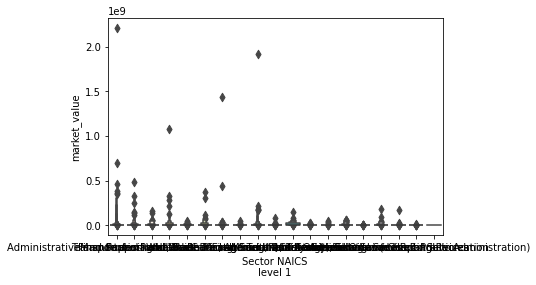

In [ ]:
#Market Value
#barplot
sns.boxenplot(x='Sector NAICS\nlevel 1', y='market_value', data=mergedDF)

In [ ]:
#Market Value median

mergedDF['market_value'].median()

1105860.1742999998

In [ ]:
# Datos del Book Value de Cada Sector
mergedDF.groupby('Sector NAICS\nlevel 1')['book_value'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,5.704446e+06,NaN,5704446.0,5.704446e+06,5704446.0,5704446.00,5704446.0
Accommodation and Food Services,69.0,5.019647e+05,2.440004e+06,-8658900.0,1.072699e+04,231685.0,954019.00,7289000.0
Administrative and Support and Waste Management and Remediation Services,132.0,2.677850e+06,7.116921e+06,-1026446.0,8.216000e+04,525086.0,1871825.00,46515000.0
"Agriculture, Forestry, Fishing and Hunting",16.0,3.406701e+06,6.635579e+06,14751.0,2.128192e+05,1068506.5,3222425.00,26071000.0
"Arts, Entertainment, and Recreation",21.0,5.061617e+06,2.096327e+07,-1081020.0,-1.053470e+05,76168.0,1678528.00,96433000.0
Construction,45.0,2.483906e+06,4.236454e+06,83162.0,4.073750e+05,963495.0,2488619.00,21789774.0
Educational Services,14.0,8.931767e+05,1.110081e+06,6605.0,2.377335e+05,649699.0,966118.00,4322243.0
Finance and Insurance,697.0,5.269128e+06,2.022819e+07,-5438611.0,2.828350e+05,1010618.0,3259895.00,286143000.0
Health Care and Social Assistance,64.0,1.032707e+06,1.861076e+06,-1656000.0,7.764775e+04,444065.5,1161768.25,10400700.0


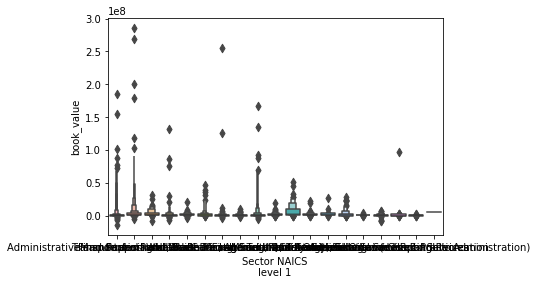

In [ ]:
#Book Value

sns.boxenplot(x='Sector NAICS\nlevel 1', y='book_value', data=mergedDF)


In [ ]:
#Market Book Value

mergedDF['book_value'].median()

431283.0

*   **For each industry For each industry (and for all industries),**
*   **What can you say about profit margin of firms? show**
*   **a) descriptive statistics of profit margin and**
*   **b) plot(s) to illustrate how profit margin changes across industries.**

In [ ]:
mergedDF.columns

Index(['firm', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'book_value', 'market_value', 'operating_profit',
       'operating_profit_margin', 'ebit', 'Sector NAICS\nlevel 1', 'Name'],
      dtype='object')

In [ ]:
MesuresDF = mergedDF[['firm', 'revenue', 'cogs', 'sgae', 'ebit']]
MesuresDF

,firm,revenue,cogs,sgae,ebit
0,A,6527000.0,3004000.0,2.056000e+06,3.600000e+05
1,AA,13386000.0,9653000.0,8.930000e+05,7.320000e+05
2,AAIC,31855.0,15523.0,0.000000e+00,4.526000e+03
3,AAL,40717000.0,0.0,4.160800e+07,1.017000e+06
4,AAME,195299.0,0.0,1.915230e+05,-2.115000e+03
...,...,...,...,...,...
3554,ZVIA,156702.0,93921.0,8.744600e+04,-1.474300e+04
3555,ZVO,230001.0,149303.0,1.118000e+05,-8.410000e+02
3556,ZWS,340300.0,195100.0,1.196000e+05,5.350000e+04
3557,ZY,14546.0,48949.0,2.327660e+05,-1.061960e+05


In [ ]:
ProfitdDF = mergedDF[['firm', 'operating_profit', 'operating_profit_margin']]
ProfitdDF

,firm,operating_profit,operating_profit_margin
0,A,3.600000e+05,0.224020
1,AA,6.570000e+05,0.200878
2,AAIC,4.526000e+03,0.415229
3,AAL,1.017000e+06,0.075771
4,AAME,-2.115000e+03,-0.047348
...,...,...,...
3554,ZVIA,-6.700000e+03,-0.323723
3555,ZVO,-9.723000e+03,-0.016368
3556,ZWS,5.380000e+04,0.188248
3557,ZY,-6.573600e+04,-40.317388


In [ ]:
mergedDF.groupby('firm')['operating_profit'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,3.600000e+05,NaN,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05
AA,1.0,6.570000e+05,NaN,6.570000e+05,6.570000e+05,6.570000e+05,6.570000e+05,6.570000e+05
AAIC,1.0,4.526000e+03,NaN,4.526000e+03,4.526000e+03,4.526000e+03,4.526000e+03,4.526000e+03
AAL,1.0,1.017000e+06,NaN,1.017000e+06,1.017000e+06,1.017000e+06,1.017000e+06,1.017000e+06
AAME,1.0,-2.115000e+03,NaN,-2.115000e+03,-2.115000e+03,-2.115000e+03,-2.115000e+03,-2.115000e+03
...,...,...,...,...,...,...,...,...
ZVIA,1.0,-6.700000e+03,NaN,-6.700000e+03,-6.700000e+03,-6.700000e+03,-6.700000e+03,-6.700000e+03
ZVO,1.0,-9.723000e+03,NaN,-9.723000e+03,-9.723000e+03,-9.723000e+03,-9.723000e+03,-9.723000e+03
ZWS,1.0,5.380000e+04,NaN,5.380000e+04,5.380000e+04,5.380000e+04,5.380000e+04,5.380000e+04


In [ ]:
mergedDF.groupby('Sector NAICS\nlevel 1')['operating_profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,126710.000000,NaN,126710.0,126710.000000,126710.000000,126710.00,126710.0
Accommodation and Food Services,69.0,235626.853177,6.324575e+05,-142000.0,5421.000000,38904.000000,157349.00,4004100.0
Administrative and Support and Waste Management and Remediation Services,132.0,163048.920693,4.942315e+05,-713000.0,95.500000,28169.000000,142138.50,4148000.0
"Agriculture, Forestry, Fishing and Hunting",16.0,218999.116694,4.485638e+05,-18135.0,-1480.750000,19268.000000,160333.75,1616000.0
"Arts, Entertainment, and Recreation",21.0,206017.041144,5.320416e+05,-368756.0,4515.000000,54549.000000,178094.00,2390000.0
Construction,45.0,223408.468889,4.700429e+05,-90554.0,18727.000000,70000.000000,207221.00,2168200.0
Educational Services,14.0,14396.571429,5.877502e+04,-141260.0,371.000000,16561.500000,38039.50,126641.0
Finance and Insurance,697.0,262307.167099,1.119289e+06,-1315000.0,11680.000000,41290.000000,137300.00,15128000.0
Health Care and Social Assistance,64.0,72550.071519,3.089014e+05,-204471.0,-10986.250000,300.000000,62180.75,2264000.0


In [ ]:
mergedDF.groupby('firm')['operating_profit_margin'].describe()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,0.224020,NaN,0.224020,0.224020,0.224020,0.224020,0.224020
AA,1.0,0.200878,NaN,0.200878,0.200878,0.200878,0.200878,0.200878
AAIC,1.0,0.415229,NaN,0.415229,0.415229,0.415229,0.415229,0.415229
AAL,1.0,0.075771,NaN,0.075771,0.075771,0.075771,0.075771,0.075771
AAME,1.0,-0.047348,NaN,-0.047348,-0.047348,-0.047348,-0.047348,-0.047348
...,...,...,...,...,...,...,...,...
ZVIA,1.0,-0.323723,NaN,-0.323723,-0.323723,-0.323723,-0.323723,-0.323723
ZVO,1.0,-0.016368,NaN,-0.016368,-0.016368,-0.016368,-0.016368,-0.016368
ZWS,1.0,0.188248,NaN,0.188248,0.188248,0.188248,0.188248,0.188248


In [ ]:
mergedDF.groupby('Sector NAICS\nlevel 1')['operating_profit_margin'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,0.463653,NaN,0.463653,0.463653,0.463653,0.463653,0.463653
Accommodation and Food Services,69.0,0.100534,0.177755,-0.593442,0.022495,0.101864,0.185184,0.746437
Administrative and Support and Waste Management and Remediation Services,132.0,-2.271517,24.967468,-286.495298,-0.023688,0.065275,0.175726,0.975751
"Agriculture, Forestry, Fishing and Hunting",16.0,-0.032423,0.289292,-0.980560,-0.067080,0.041809,0.105006,0.245713
"Arts, Entertainment, and Recreation",21.0,-0.002046,0.569222,-2.043234,0.045115,0.135304,0.276587,0.606817
Construction,45.0,0.099567,0.154027,-0.543047,0.037063,0.091377,0.180423,0.539738
Educational Services,14.0,-0.001653,0.296101,-0.944201,0.007309,0.039924,0.117768,0.328612
Finance and Insurance,696.0,-inf,NaN,-inf,0.187876,0.616043,0.926012,7.453061
Health Care and Social Assistance,64.0,-inf,NaN,-inf,-0.363581,-0.038219,0.088428,0.268134


In [ ]:
#mergedDF.groupby('Sector NAICS\nlevel 1')['operating_profit_margin']

!pip install plotly.express
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Sample de los datos para poder observar de manera más limpia los datos**

In [ ]:
fig1 =px.scatter(x=mergedDF['Sector NAICS\nlevel 1'].iloc[0:10], y=mergedDF['operating_profit_margin'].iloc[0:10], template='plotly_dark')

fig1.show()

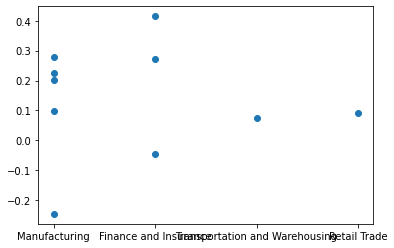

In [ ]:
plt.scatter(mergedDF['Sector NAICS\nlevel 1'].iloc[0:10], mergedDF['operating_profit_margin'].iloc[0:10])

**Ploteo Genneral de todas las industrias con su debido Operating Profit Margin**

In [ ]:
fig2 = px.scatter(x=mergedDF['Sector NAICS\nlevel 1'], y=mergedDF['operating_profit_margin'], template='plotly_dark')

fig2.show()



*   **Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?**


In [ ]:
mergedDF['market_value'].nlargest(n=10)


8       2.212838e+09
2097    1.920840e+09
1379    1.435042e+09
200     1.080624e+09
3182    6.976698e+08
3263    4.818731e+08
1721    4.671001e+08
2001    4.363946e+08
2255    3.789750e+08
3300    3.743426e+08
Name: market_value, dtype: float64

In [ ]:
mergedDF.loc[[8, 2097, 1379, 200, 3182, 3263, 1721, 2001, 2255, 3300],'firm']

8        AAPL
2097     MSFT
1379    GOOGL
200      AMZN
3182     TSLA
3263      UNH
1721      JNJ
2001     META
2255     NVDA
3300        V
Name: firm, dtype: object


*   **Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?**

In [ ]:
mergedDF['book_value'].nlargest(n=10)

1727    286143000.0
374     269118000.0
1379    255419000.0
545     199626000.0
3509    184508000.0
3430    179793000.0
2097    166542000.0
861     154562000.0
3050    135307000.0
200     131402000.0
Name: book_value, dtype: float64

In [ ]:
mergedDF.loc[[1727, 374, 1379, 545, 3509, 3430, 2097, 861, 3050, 200],'firm']

1727      JPM
374       BAC
1379    GOOGL
545         C
3509      XOM
3430      WFC
2097     MSFT
861       CVX
3050        T
200      AMZN
Name: firm, dtype: object

# 2.2.1.2 Considering the whole history of financial data for all firms:    



*   **How can you measure firm profitability that can be used to compare performance among firms of different sizes?**
*   **Select and justify at least 3 measures and show descriptive statistics**





*   **Calculate and explain earnings per share deflated by price.**




In [ ]:
mergedDF.columns

Index(['firm', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'book_value', 'market_value', 'operating_profit',
       'operating_profit_margin', 'ebit', 'Sector NAICS\nlevel 1', 'Name'],
      dtype='object')